In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
import seaborn as sns
import plotly.express as px
from sklearn.mixture import GaussianMixture
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ecommerce.csv', sep=',',header=None)
print(df.head())

        0        1       2       3       4
0 -7.0237  -2.7803 -1.5966  0.2197 -5.9672
1 -9.4213   9.1296  7.2426 -4.7139 -5.2615
2 -9.3710   9.4341  6.1217 -3.4081 -7.5911
3 -2.5985   4.1524  3.1033  1.5943 -8.7513
4 -0.8058  10.4453  5.6170  1.5003 -5.7412


In [3]:
#scaling the numerical values
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled

0         1         2         3         4
0   -0.227233 -0.519598 -2.077135  0.268021 -0.560407
1   -1.039132  0.954722  0.799478 -1.128267 -0.411456
2   -1.022099  0.992416  0.434694 -0.758704 -0.903160
3    1.271271  0.338597 -0.547608  0.657054 -1.148041
4    1.878332  1.117592  0.270446  0.630451 -0.512705
..        ...       ...       ...       ...       ...
995  1.444344  0.959798 -0.078099  0.444198 -0.841845
996  1.319424  0.810520  0.056893  0.716601 -0.822954
997  0.949539  0.807054  0.389328  0.639054 -0.357950
998 -2.172898  0.875287  0.829678 -2.588798 -0.802269
999  0.096531 -0.783901 -1.299793 -0.437255 -0.310249

[1000 rows x 5 columns]

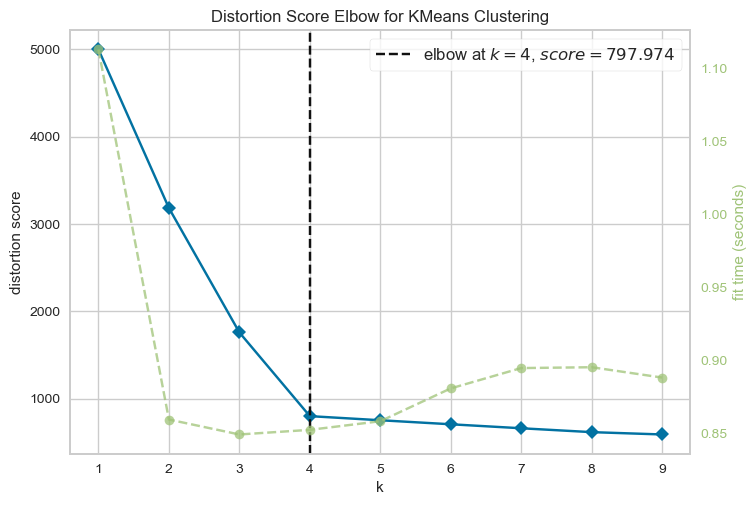

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [4]:
# elbow method using yellowbrick library
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), random_state = 42)
visualizer.fit(df_scaled)      
visualizer.show()        


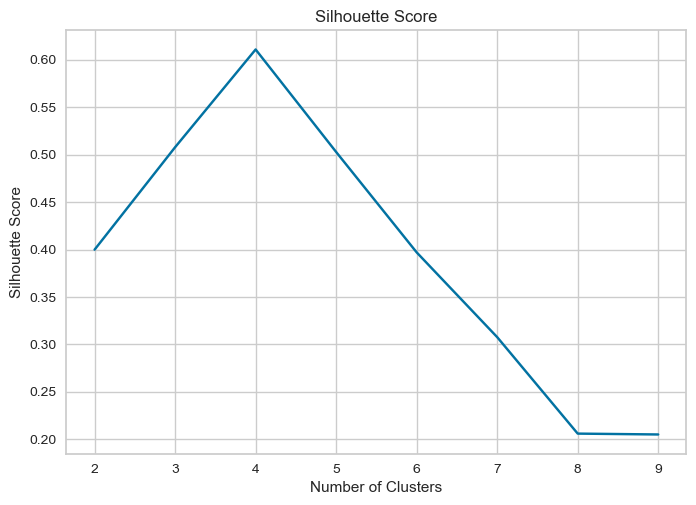

In [5]:
#Silhouette Score
sil_scores = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    sil_scores.append(silhouette_avg)

plt.plot(range(2, 10), sil_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


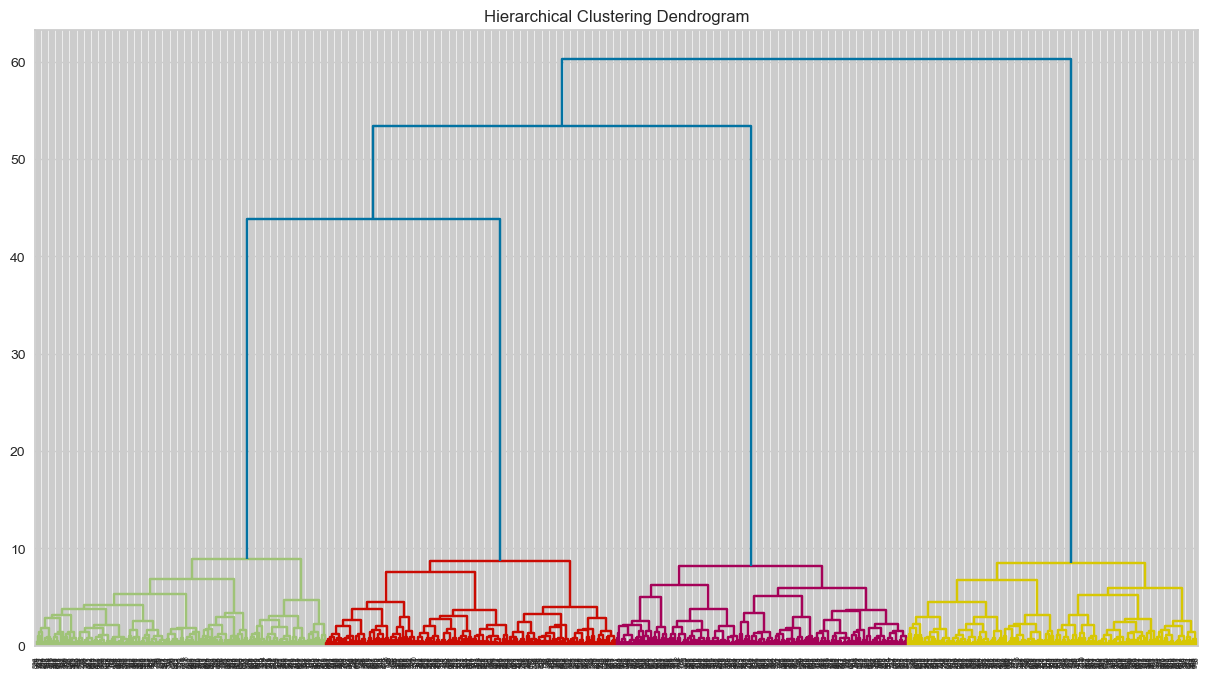

In [6]:
#hierarchical clustering
linked = linkage(df_scaled, 'ward')

plt.figure(figsize=(15, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


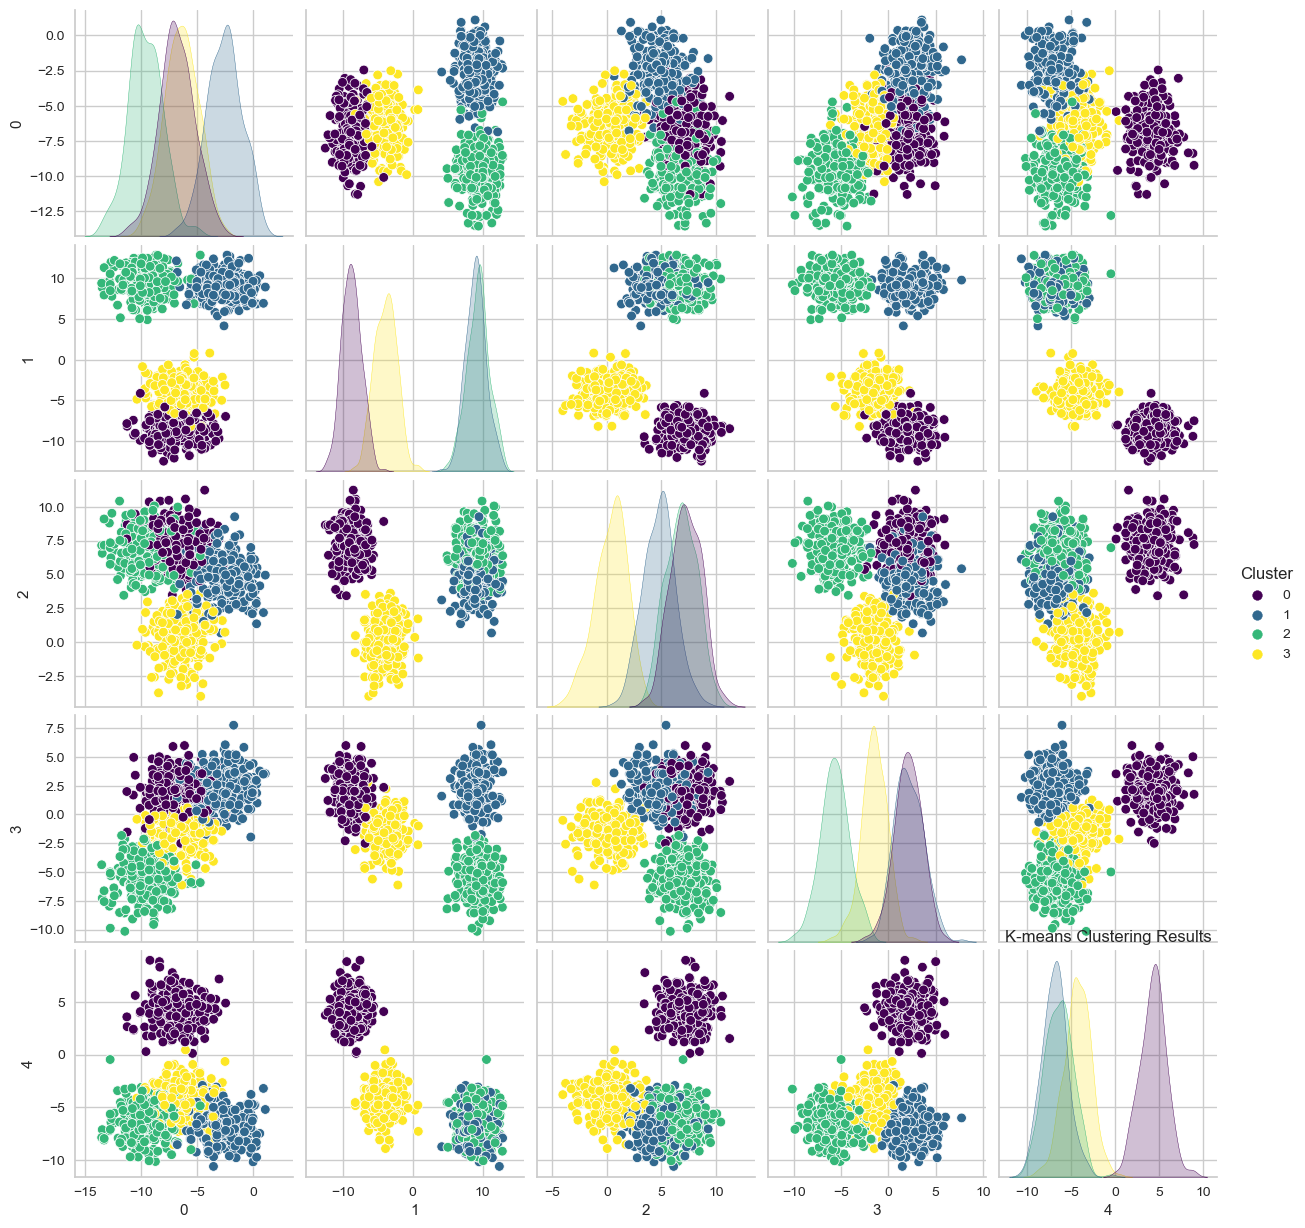

In [7]:
#K-means clustering
final_kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = final_kmeans.fit_predict(df_scaled)

sns.pairplot(df , vars=[0,1,2,3,4], hue='Cluster', palette='viridis')
plt.title('K-means Clustering Results')
plt.show()

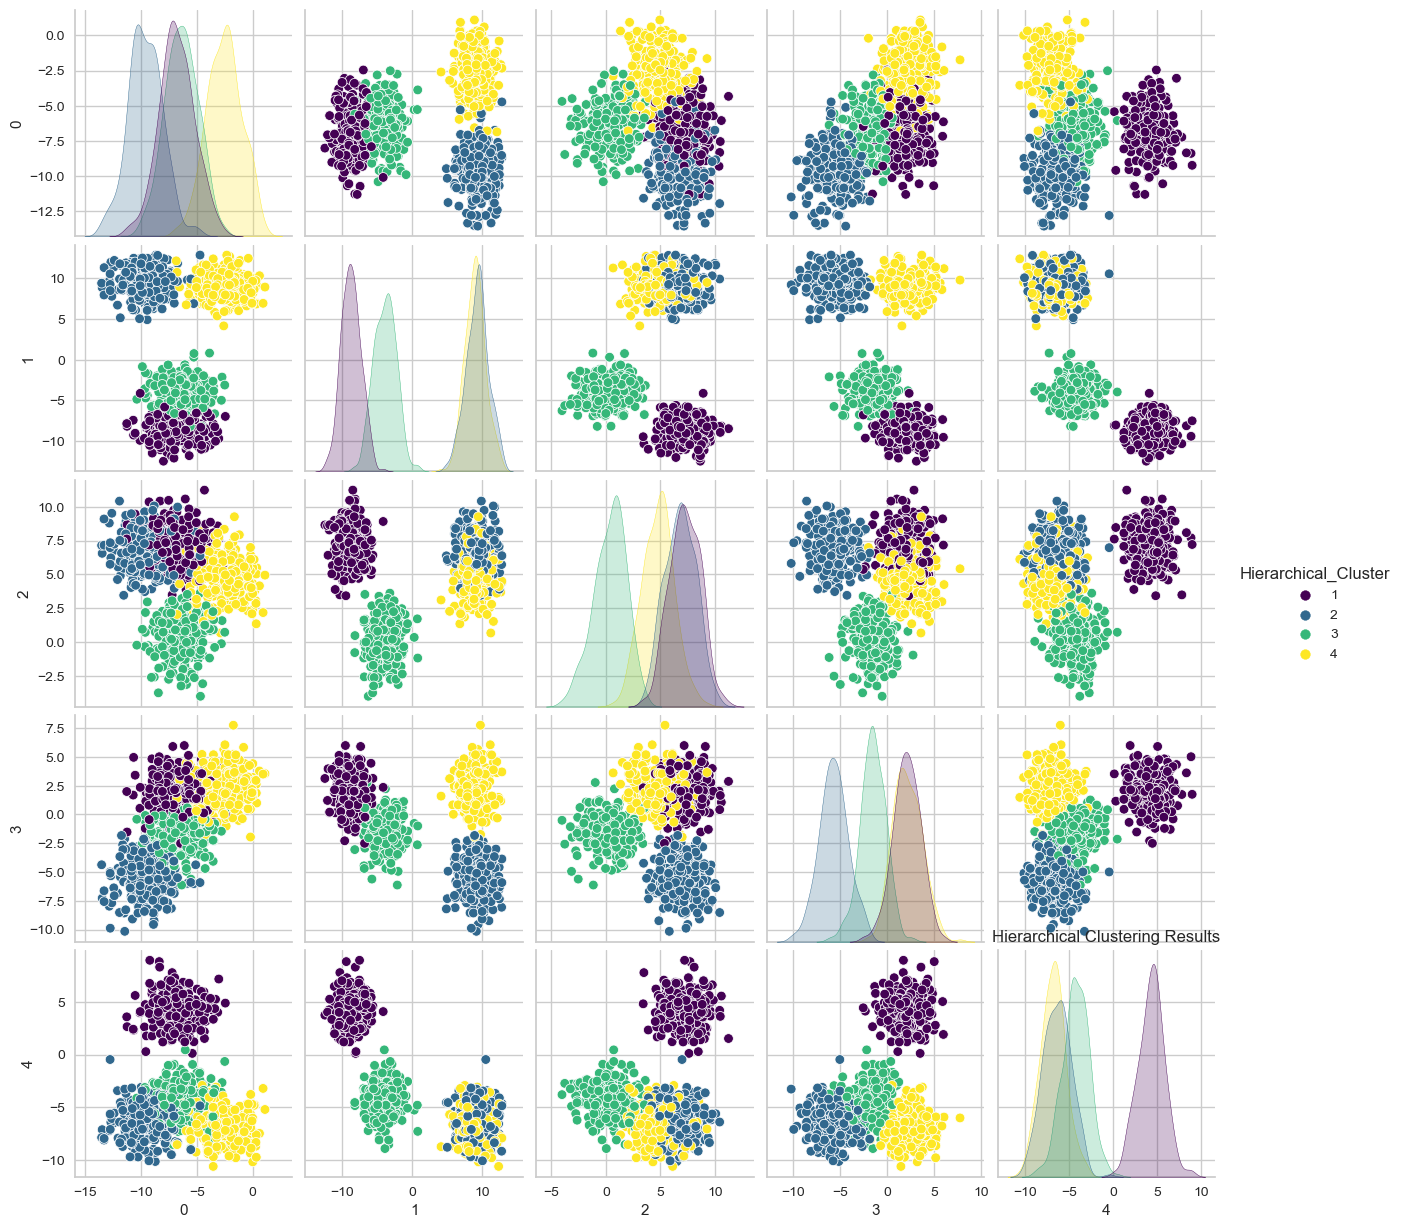

In [8]:
#Hierarchical clustering
#cutting th dendogram at 30 for 4 clusters
hierarchical_clusters = fcluster(linked, 30, criterion='distance')
df['Hierarchical_Cluster'] = hierarchical_clusters

sns.pairplot(df , vars=[0,1,2,3,4], hue='Hierarchical_Cluster',palette='viridis')
plt.title('Hierarchical Clustering Results')
plt.show()

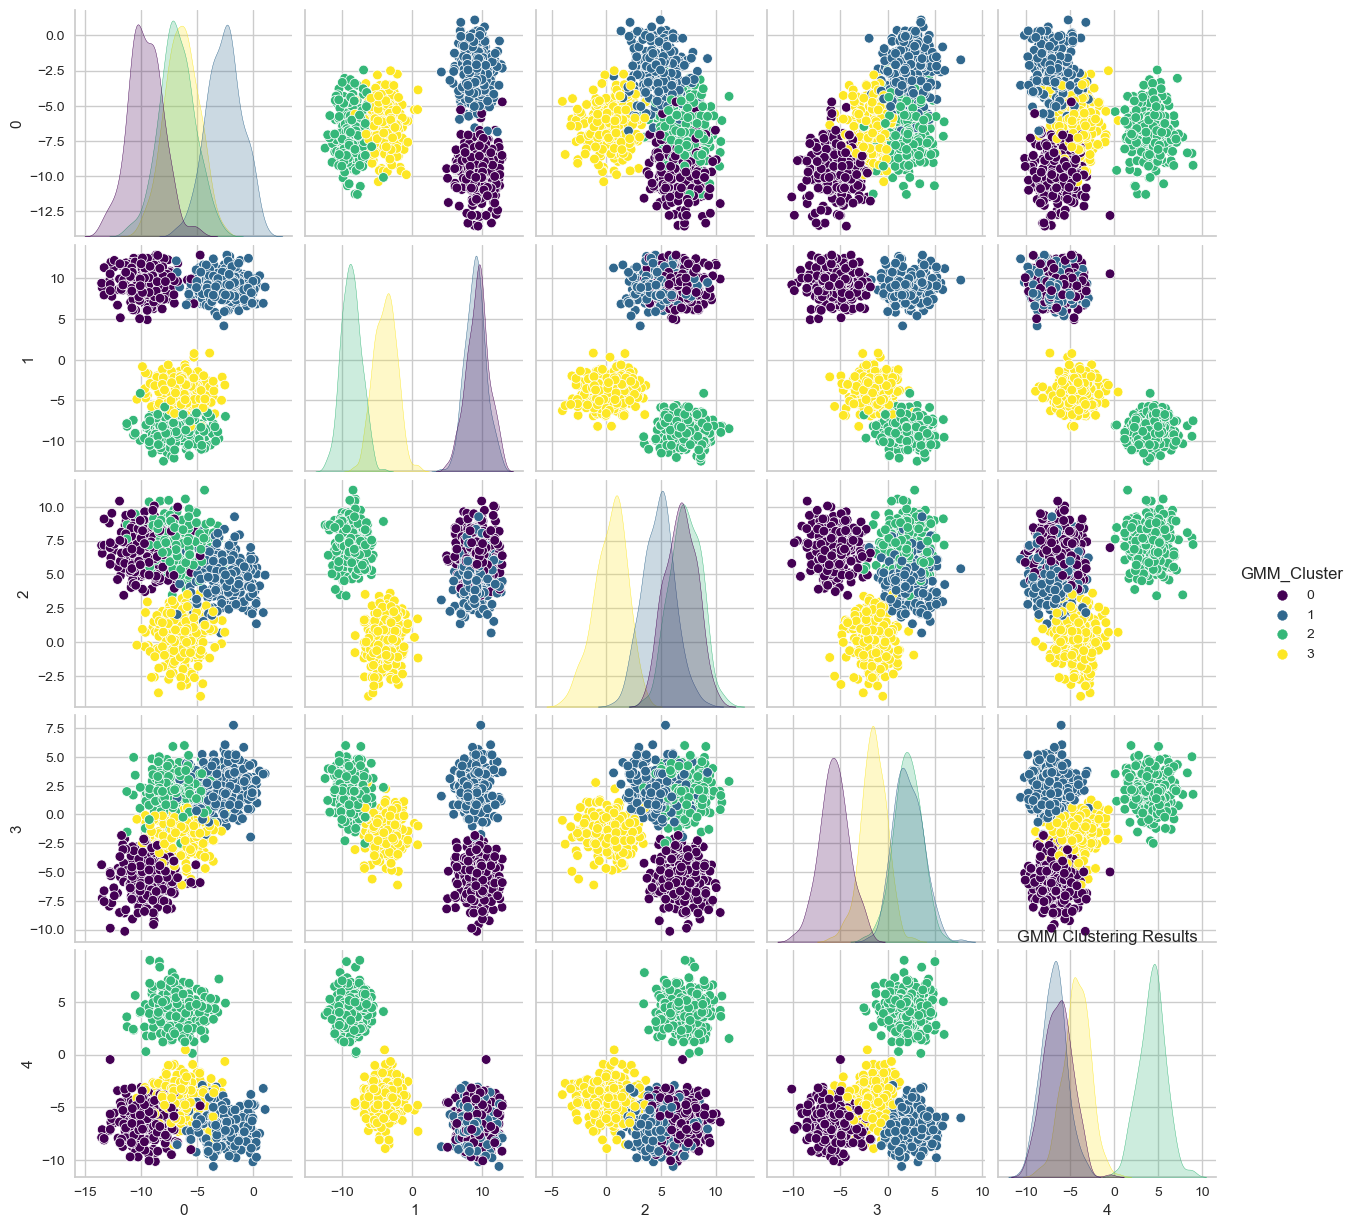

In [9]:
#GMM
gmm = GaussianMixture(n_components=4)
df['GMM_Cluster'] = gmm.fit_predict(df_scaled)
sns.pairplot(df , vars=[0,1,2,3,4], hue='GMM_Cluster',palette='viridis')
plt.title('GMM Clustering Results')
plt.show()

In [10]:
fig = px.scatter_3d(df, x=0, y=1, z=2, color='Hierarchical_Cluster')
fig.update_layout(title='Hierarchical Clustering Results')
fig.show()